# Fashion MNIST
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

Fashion MNIST는 MNIST와 동일한 입출력 구조를 지니고 있으나 숫자 대신 의류의 종류를 예측합니다.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

0:	T-shirt/top
1:	Trouser
2:	Pullover
3:	Dress
4:	Coat
5:	Sandal
6:	Shirt
7:	Sneaker
8:	Bag
9:	Ankle boot

In [1]:
# 데이터셋 불러오기
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## TODO 1: 훈련 데이터 살펴보기

1. 훈련 데이터의 처음 세 장을 그려보세요.

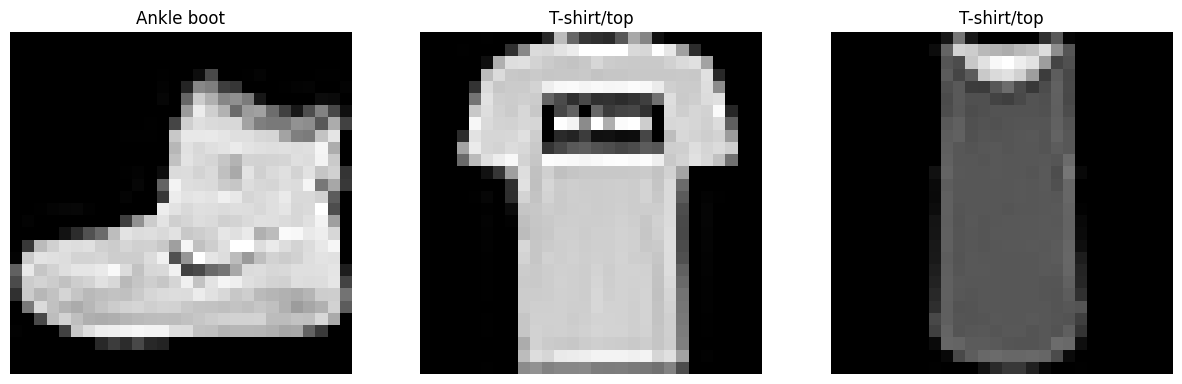

In [7]:
# TODO: 아래 빈 칸을 채우세요.
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 10))
for idx in range(3):
  plt.subplot(1, 3, idx+1)        # 행은 1개, 열은 3개, 몇 번째 그림을 그릴 것인지 기재 (1부터 시작하는 숫자)
  plt.imshow(train_images[idx], cmap='gray')  # 이미지 흑백으로 그리기
  plt.title(class_names[train_labels[idx]])                # 상기 class_names를 활용하여 그림 제목으로 정답(label)을 표시해보세요. 예: 숫자가 아닌 Shirt, Bag 등
  plt.axis('off')
plt.show()

## TODO 2: 데이터 전처리 (모양 바꾸기, 정규화, 레이블 변환[선택])
레이블 변환을 수행하지 않을 경우 TODO3의 loss에 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 사용해야 합니다.

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## TODO 3: 모델 훈련 (모델 생성, compile, fit, evaluate)
테스트 데이터에 대해 88% 이상의 정확도를 보이는 모델을 만들어 보세요.

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6536 - loss: 0.9603 - val_accuracy: 0.8453 - val_loss: 0.4310
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.8205 - loss: 0.4950 - val_accuracy: 0.8724 - val_loss: 0.3527
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.8494 - loss: 0.4223 - val_accuracy: 0.8792 - val_loss: 0.3268
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.8628 - loss: 0.3793 - val_accuracy: 0.8861 - val_loss: 0.3034
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.8708 - loss: 0.3619 - val_accuracy: 0.8910 - val_loss: 0.2933
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8752 - loss: 0.3444 - val_accuracy: 0.8945 - val_loss: 0.2797
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.8838 - loss: 0.3185 - val_accuracy: 0.8997 - val_loss: 0.2716
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.8884 - loss: 0.3066 - 

## TODO 4: 틀린 예제 확인하기
TODO 3에서 만든 모델이 잘못 분류하는 그림을 테스트 데이터에서 하나 이상 찾아 그려보세요. <br>
(원래 레이블과 모델이 예측한 레이블은 그림 제목에 표시)

HInt: predict() 함수로 테스트 데이터에 대한 예측을 수행하고 예측값과 실제값을 비교하여 틀린 예제를 찾아내면 됩니다. predict() 함수는 test_images와 같이 여러 장의 그림이 저장된 배열 형태의 입력을 받습니다. [예: network.predict(test_images)]

https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict



predict() 함수는 첫 번째 그림에 대한 예측, 두 번째 그림에 대한 예측, ..., 마지막 그림에 대한 예측을 배열로 반환합니다. 각 예측은 [0번 클래스인 T-shirt일 확률, 1번 클래스인 Trouser일 확률, ..., 9번 클래스인 Ankle boot일 확률]의 모양을 지니고 있습니다. 이중 가장 큰 확률을 지닌 인덱스를 꺼내고 싶으면 np.argmax()함수에 넣어주면 됩니다.

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

np.max() 함수는 배열에서 가장 큰 값을 반환하고 np.argmax() 함수는 배열에서 가장 큰 값을 지닌 인덱스를 반환하니 필요에 따라 잘 선택하여 사용합시다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


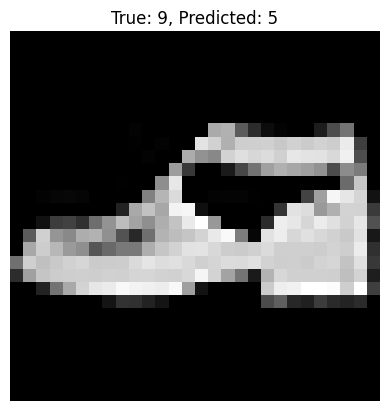

In [17]:
predictions = model.predict(test_images)
incorrect_indices = []
for i in range(len(test_images)):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label != true_label:
        incorrect_indices.append(i)
if incorrect_indices:
    idx = incorrect_indices[0]
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}, Predicted: {np.argmax(predictions[idx])}")
    plt.axis('off')
    plt.show()
else:
    print("모든 테스트 데이터가 올바르게 분류되었습니다.")